In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set (color_codes = True)

path = r"C:\Users\DELL\OneDrive - Nottingham Trent University\AI Assignment\balanced_pricerunner.csv" # This is file from local path file can be found online on google drive 
df = pd.read_csv(path) # Use link to download dataset https://drive.google.com/file/d/1raQWG47QiuOjqFBiecJMUEYDNcfcJihe/view?usp=sharing



**Checking Dataframe **

In [70]:
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,72.0,apple iphone 8 64gb space grey,1.0,4.0,Apple iPhone 8 64GB,2612.0,Mobile Phones
1,134.0,apple iphone x 256gb silver,1.0,7.0,Apple iPhone X 256GB,2612.0,Mobile Phones
2,21954.0,nikon d7500 18 140mm vr kit,1.0,38929.0,Nikon D7500 + 18-140mm VR,2617.0,Digital Cameras
3,22156.0,nikon d5600 digital slr camera with af s 18 14...,1.0,38955.0,Nikon D5600 + 18-140mm VR,2617.0,Digital Cameras
4,34950.0,samsung rr39m7340sa/eu frost free fridge with ...,1.0,43285.0,Samsung RZ32M7120SA Silver,2621.0,Freezers


**Information on DataFrame**

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1108 non-null   float64
 1   Product Title   1108 non-null   object 
 2   Merchant ID     1108 non-null   float64
 3   Cluster ID      1108 non-null   float64
 4   Cluster Label   1108 non-null   object 
 5   Category ID     1108 non-null   float64
 6   Category Label  1108 non-null   object 
dtypes: float64(4), object(3)
memory usage: 62.1+ KB


In [72]:
print("Column names in the DataFrame:")
print(df.columns)

Column names in the DataFrame:
Index(['Product ID', 'Product Title', 'Merchant ID', 'Cluster ID',
       'Cluster Label', 'Category ID', 'Category Label'],
      dtype='object')


In [73]:
df.rename(columns=lambda x: x.strip(), inplace=True)
df.rename(columns={
    ' Merchant ID': 'MerchantID',
    ' Cluster ID': 'ClusterID',
    ' Cluster Label': 'ClusterLabel',
    ' Category ID': 'CategoryID',
    ' Category Label': 'CategoryLabel'
}, inplace=True)
print(df.columns)

Index(['Product ID', 'Product Title', 'Merchant ID', 'Cluster ID',
       'Cluster Label', 'Category ID', 'Category Label'],
      dtype='object')


In [74]:
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,72.0,apple iphone 8 64gb space grey,1.0,4.0,Apple iPhone 8 64GB,2612.0,Mobile Phones
1,134.0,apple iphone x 256gb silver,1.0,7.0,Apple iPhone X 256GB,2612.0,Mobile Phones
2,21954.0,nikon d7500 18 140mm vr kit,1.0,38929.0,Nikon D7500 + 18-140mm VR,2617.0,Digital Cameras
3,22156.0,nikon d5600 digital slr camera with af s 18 14...,1.0,38955.0,Nikon D5600 + 18-140mm VR,2617.0,Digital Cameras
4,34950.0,samsung rr39m7340sa/eu frost free fridge with ...,1.0,43285.0,Samsung RZ32M7120SA Silver,2621.0,Freezers


In [75]:
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 Product ID        25
Product Title     25
Merchant ID       25
Cluster ID        25
Cluster Label     25
Category ID       25
Category Label    25
dtype: int64


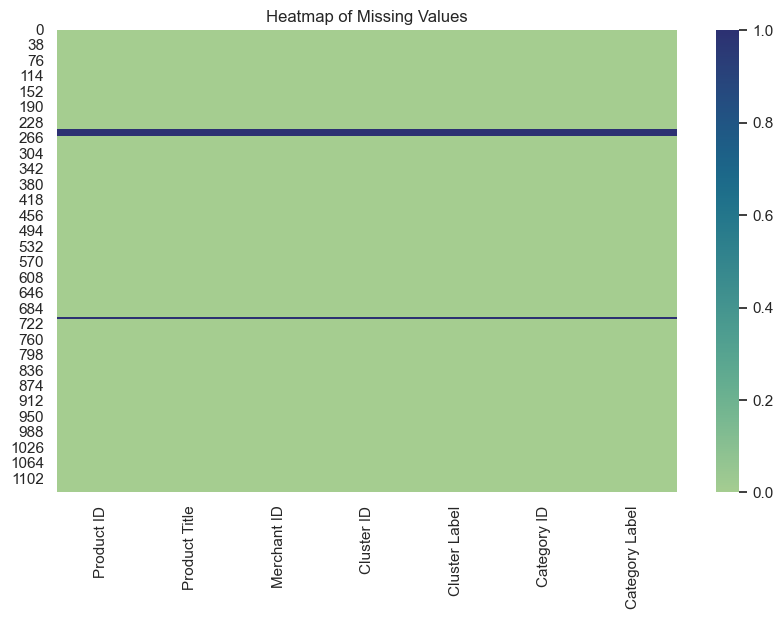

In [76]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='crest') #https://seaborn.pydata.org/generated/seaborn.heatmap
plt.title('Heatmap of Missing Values') 
plt.show()

In [77]:
df=df.dropna() # 

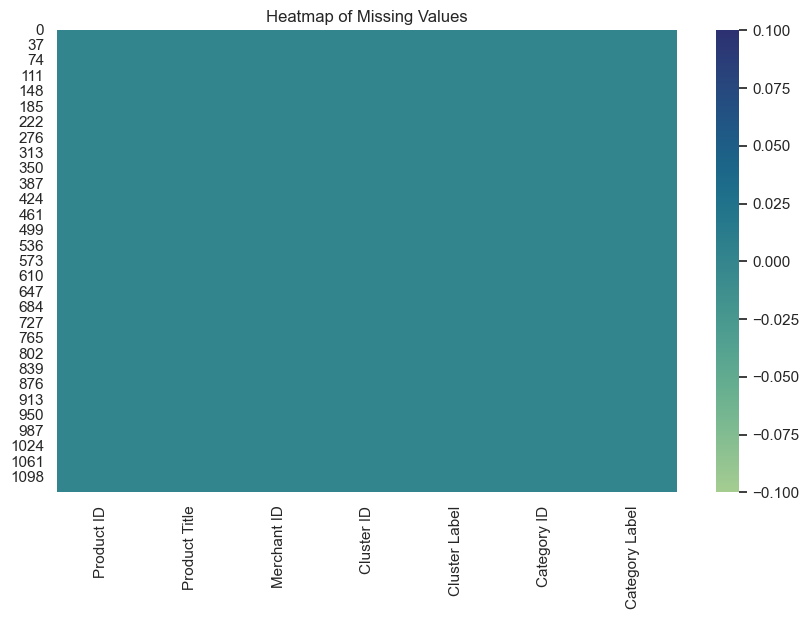

In [78]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='crest')
plt.title('Heatmap of Missing Values')
plt.show()

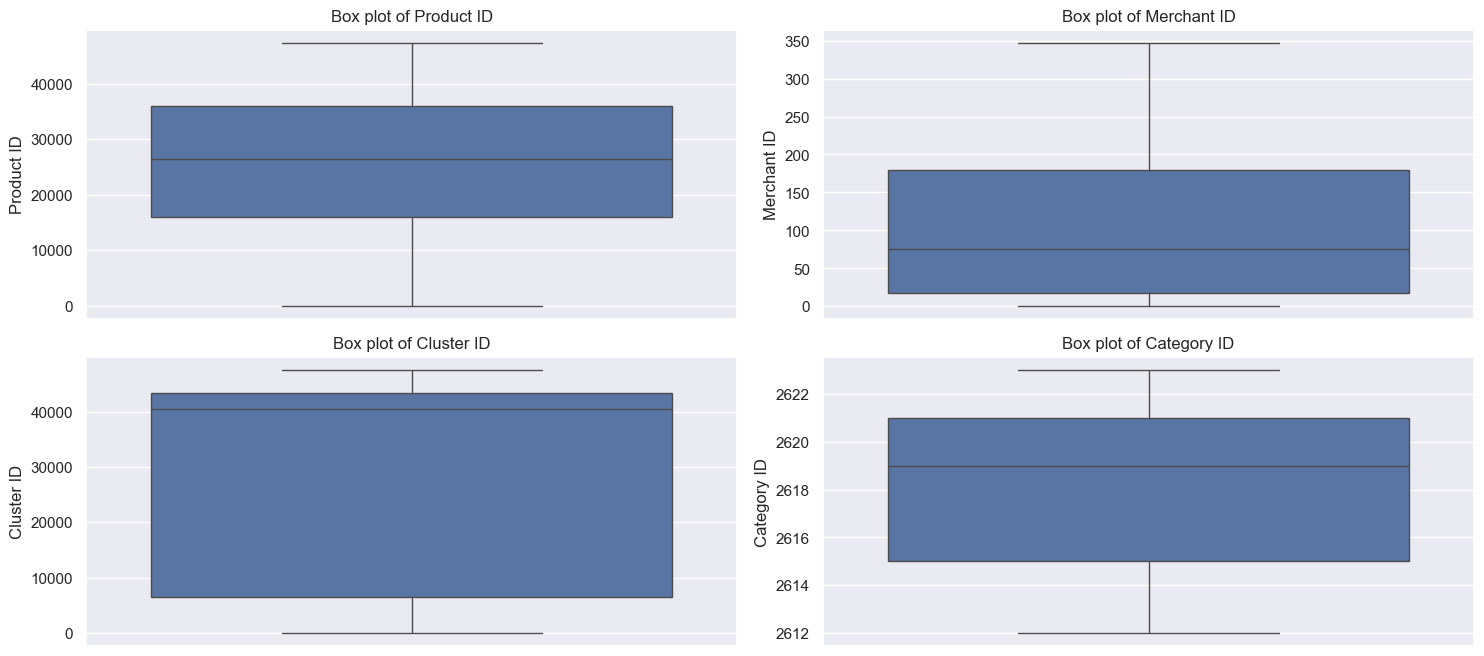

In [79]:
numerical_cols = df.select_dtypes(include=[np.number])

# Box plots for each numerical column to visualize outliers
# https://stackoverflow.com/questions/78042738/boxplot-analysis
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols.columns, 1):
    plt.subplot(len(numerical_cols.columns) // 2 + 1, 2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

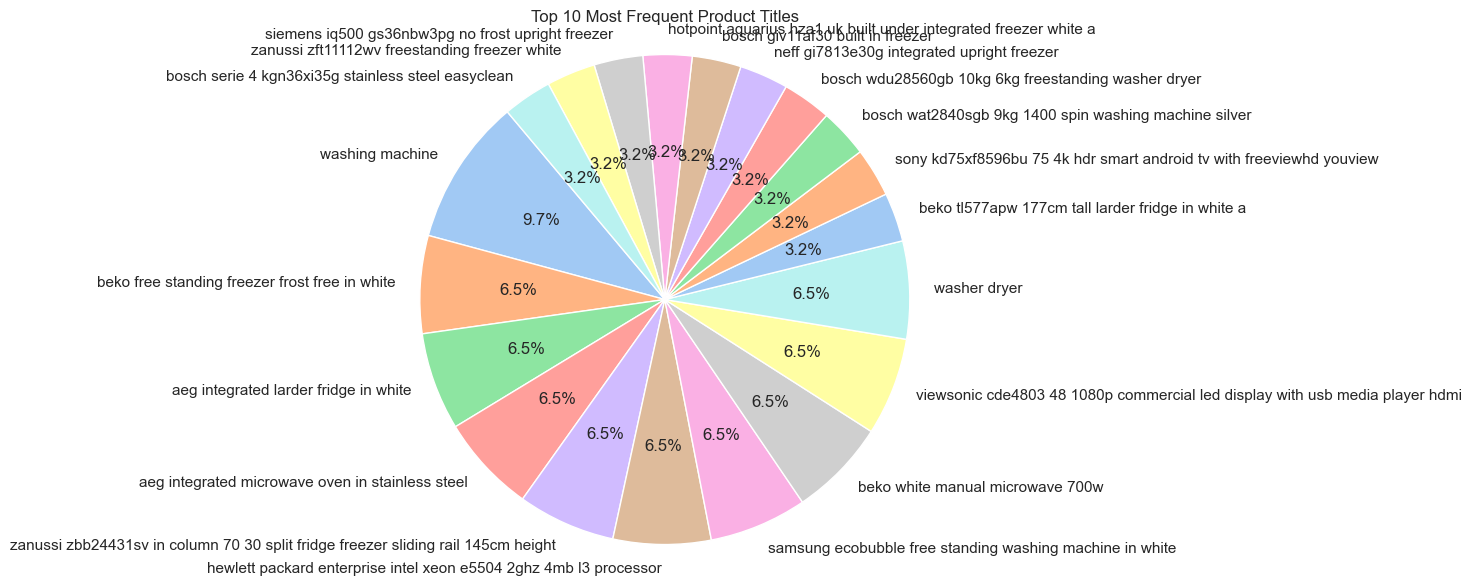

In [80]:
# Top 10 most frequent 'Product Title' values
top_product_titles = df['Product Title'].value_counts().nlargest(20)
# https://stackoverflow.com/questions/72640253/how-to-plot-pie-chart-using-data-in-pandas
# Pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_product_titles, labels=top_product_titles.index, autopct='%1.1f%%', startangle=130, colors=sns.color_palette('pastel'))
plt.title('Top 10 Most Frequent Product Titles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

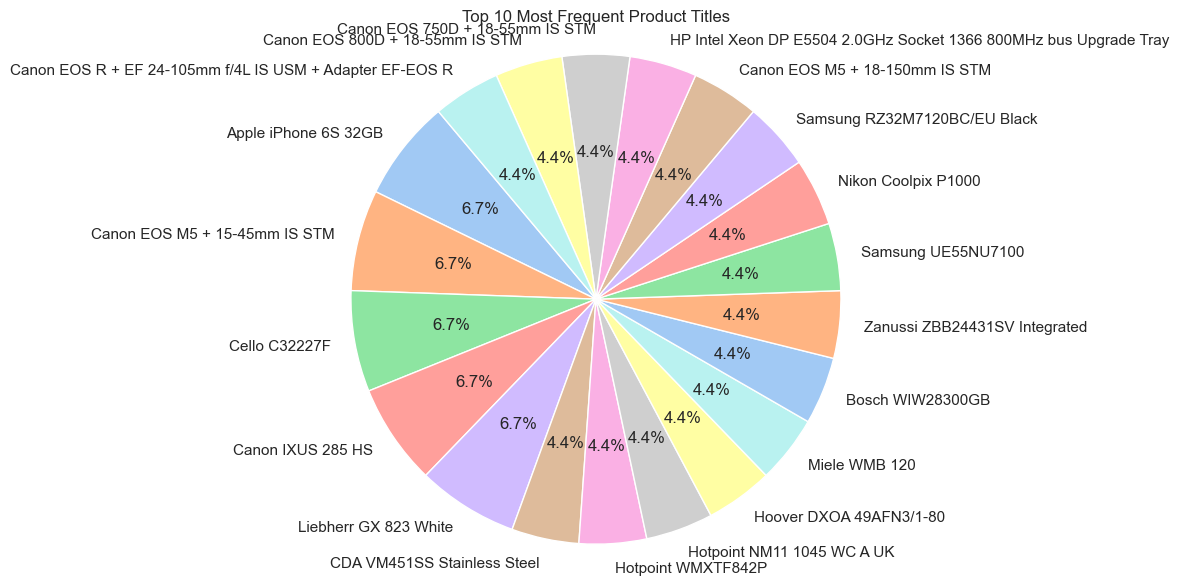

In [81]:
top_product_titles = df['Cluster Label'].value_counts().nlargest(20)

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_product_titles, labels=top_product_titles.index, autopct='%1.1f%%', startangle=130, colors=sns.color_palette('pastel'))
plt.title('Top 10 Most Frequent Product Titles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

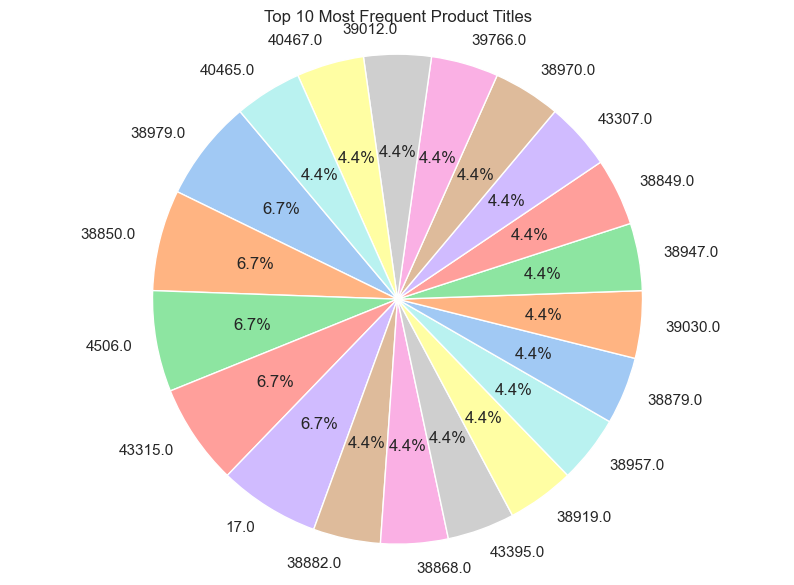

In [82]:
top_product_titles = df['Cluster ID'].value_counts().nlargest(20)

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_product_titles, labels=top_product_titles.index, autopct='%1.1f%%', startangle=130, colors=sns.color_palette('pastel'))
plt.title('Top 10 Most Frequent Product Titles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

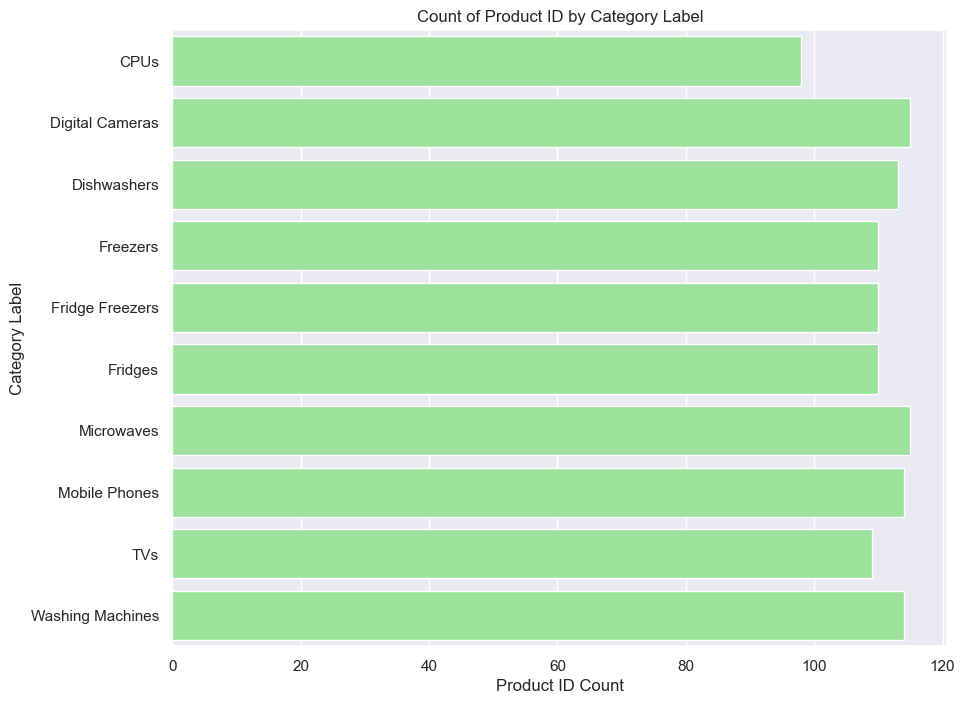

In [83]:
# Group by 'Category Label' and count 'Product ID'
category_product_counts = df.groupby('Category Label')['Product ID'].count().reset_index()
category_product_counts.rename(columns={'Product ID': 'Product ID Count'}, inplace=True)

# Create a bar plot
#https://stackoverflow.com/questions/67755912/barchart-plot-and-display-issue-in-jupyter-notebook-when-using-matplotlib
plt.figure(figsize=(10, 8))
sns.barplot(data=category_product_counts, x='Product ID Count', y='Category Label', color = "lightgreen")
plt.title('Count of Product ID by Category Label')
plt.xlabel('Product ID Count')
plt.ylabel('Category Label')
plt.show()

In [84]:
# Group by 'Category ID' and count 'Product ID'
category_ID_product_counts = df.groupby('Category ID')['Product ID'].count().reset_index()


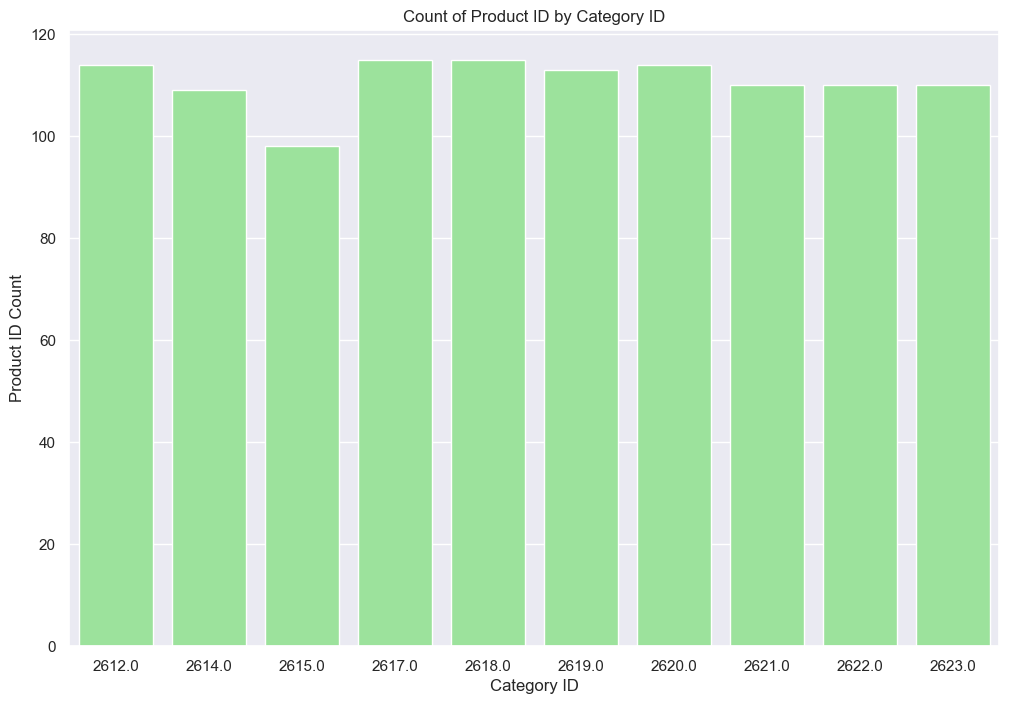

In [85]:
category_ID_product_counts.rename(columns={'Product ID': 'Product ID Count'}, inplace=True)
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=category_ID_product_counts, x='Category ID', y='Product ID Count', color = "lightgreen")
plt.title('Count of Product ID by Category ID')
plt.xlabel('Category ID')
plt.ylabel('Product ID Count')
plt.show()


In [86]:
from sklearn.preprocessing import LabelEncoder
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
#https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn


# Apply Label Encoder to each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Ensure all data is treated as strings
    label_encoders[col] = le

# Display the transformed DataFrame
print(df.head())

   Product ID  Product Title  Merchant ID  Cluster ID  Cluster Label  \
0        72.0             88          1.0         4.0             64   
1       134.0             92          1.0         7.0             67   
2     21954.0            712          1.0     38929.0            663   
3     22156.0            706          1.0     38955.0            657   
4     34950.0            839          1.0     43285.0            781   

   Category ID  Category Label  
0       2612.0               7  
1       2612.0               7  
2       2617.0               1  
3       2617.0               1  
4       2621.0               3  


In [105]:
df.to_csv('output.csv', index=False)

Correlation Matrix:
                 Product ID  Product Title  Merchant ID  Cluster ID  \
Product ID        1.000000      -0.047386     0.430844    0.894883   
Product Title    -0.047386       1.000000     0.019449   -0.044021   
Merchant ID       0.430844       0.019449     1.000000    0.411279   
Cluster ID        0.894883      -0.044021     0.411279    1.000000   
Cluster Label    -0.023359       0.899408     0.027584   -0.026448   
Category ID       0.993378      -0.059055     0.423375    0.911229   
Category Label   -0.129322       0.127394    -0.051104   -0.154397   

                Cluster Label  Category ID  Category Label  
Product ID          -0.023359     0.993378       -0.129322  
Product Title        0.899408    -0.059055        0.127394  
Merchant ID          0.027584     0.423375       -0.051104  
Cluster ID          -0.026448     0.911229       -0.154397  
Cluster Label        1.000000    -0.037441        0.127225  
Category ID         -0.037441     1.000000       -0.

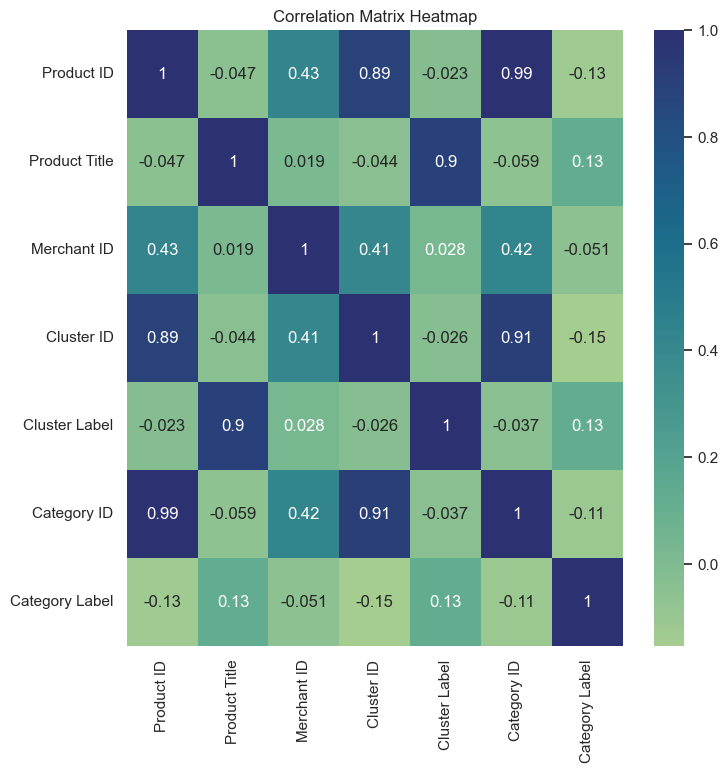

In [87]:
# Calculate the correlation matrix
#https://www.geeksforgeeks.org/how-to-create-a-correlation-matrix-using-pandas/
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix
#https://seaborn.pydata.org/generated/seaborn.heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Matrix Heatmap')
plt.show()

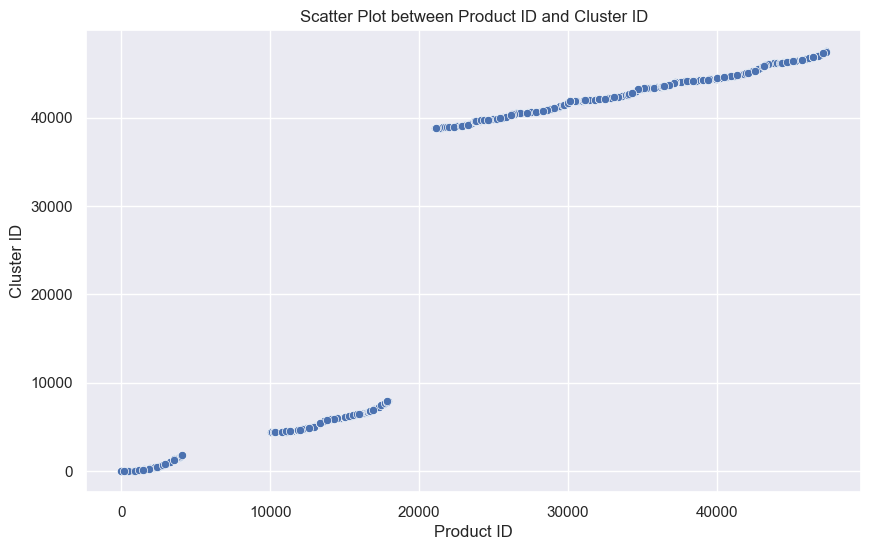

In [88]:
# Create a scatter plot
#https://stackoverflow.com/questions/71610934/how-to-make-a-scatter-plot-on-jupyter-notebook-python
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Product ID', y='Cluster ID', data=df)
plt.title('Scatter Plot between Product ID and Cluster ID')
plt.xlabel('Product ID')
plt.ylabel('Cluster ID')
plt.show()

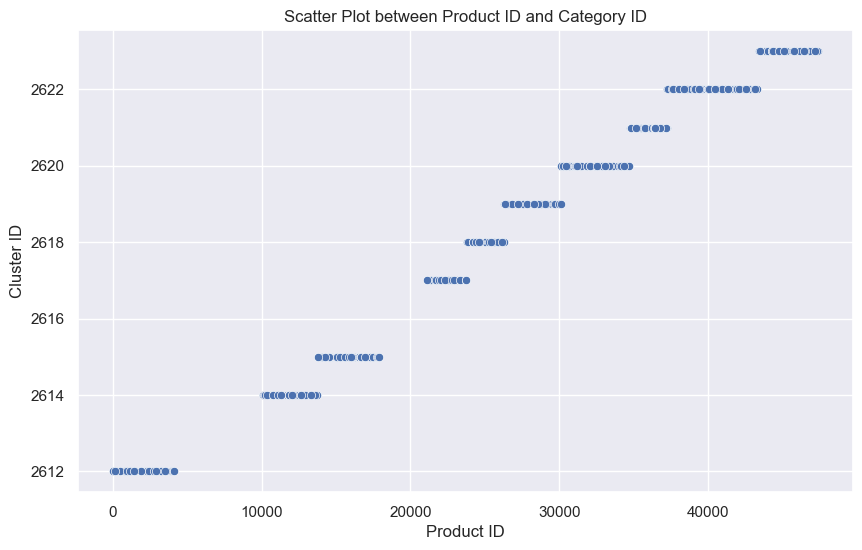

In [89]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Product ID', y='Category ID', data=df)
plt.title('Scatter Plot between Product ID and Category ID')
plt.xlabel('Product ID')
plt.ylabel('Cluster ID')
plt.show()

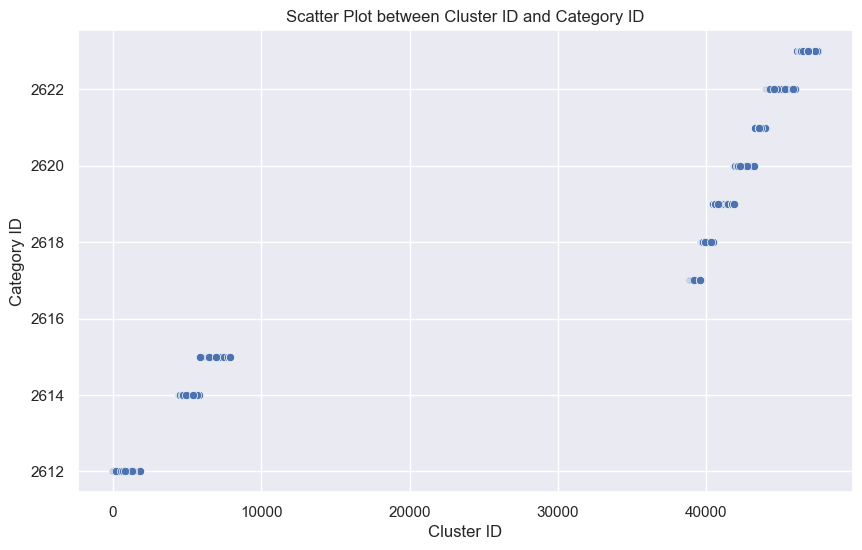

In [90]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cluster ID', y='Category ID', data=df)
plt.title('Scatter Plot between Cluster ID and Category ID')
plt.xlabel('Cluster ID')
plt.ylabel('Category ID')
plt.show()

In [91]:
df.head()

,Product ID,Product Title,Merchant ID,Cluster ID,Cluster Label,Category ID,Category Label
0,72.0,88,1.0,4.0,64,2612.0,7
1,134.0,92,1.0,7.0,67,2612.0,7
2,21954.0,712,1.0,38929.0,663,2617.0,1
3,22156.0,706,1.0,38955.0,657,2617.0,1
4,34950.0,839,1.0,43285.0,781,2621.0,3


In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn.svm import SVC #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC
from sklearn.metrics import accuracy_score, classification_report #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report
# Select features and target
X = df[['Product ID', 'Merchant ID', 'Cluster ID', 'Product Title', 'Cluster Label']]
y = df['Category Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler() #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='poly')  # You can change the kernel to 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train) #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Predict on the test set
y_pred = svm_model.predict(X_test) #https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python

# Evaluate the model
accuracy_poly = accuracy_score(y_test, y_pred) #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

accuracy_poly


0.6981981981981982

In [93]:
# Create and train the SVM model
svm_model = SVC(kernel='rbf')  # You can change the kernel to 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy_rbf = accuracy_score(y_test, y_pred)
accuracy_rbf

0.8018018018018018

In [94]:
# Create and train the SVM model
svm_model = SVC(kernel='linear')  # You can change the kernel to 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred)

accuracy_linear


0.9414414414414415

In [95]:
# Print all accuracy values together
print("Accuracy_ploy:", accuracy_poly, "Accuracy_rbf:", accuracy_rbf, "Accuracy_linear:", accuracy_linear)


Accuracy_ploy: 0.6981981981981982 Accuracy_rbf: 0.8018018018018018 Accuracy_linear: 0.9414414414414415


In [96]:
from sklearn.neural_network import MLPClassifier
# Create the MLP classifier 
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
mlp = MLPClassifier(hidden_layer_sizes=(25, 18, 10, 5), activation='relu', solver='adam', max_iter=500)

# Train the MLP classifier
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy_relu = accuracy_score(y_test, y_pred)

print("accuracy_relu:", accuracy_relu)

accuracy_relu: 0.990990990990991


In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# CNN network
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(len(y.unique()), activation='softmax')  # for classification Task
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
# Training 
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f" accuracy: {accuracy * 100:.2f}%")

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9752 - loss: 0.1058 - val_accuracy: 0.9775 - val_loss: 0.1056
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9865 - loss: 0.0854 - val_accuracy: 0.9775 - val_loss: 0.1114
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9730 - loss: 0.0940 - val_accuracy: 0.9730 - val_loss: 0.1136
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9848 - loss: 0.0976 - val_accuracy: 0.9685 - val_loss: 0.1083
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9838 - loss: 0.0874 - val_accuracy: 0.9775 - val_loss: 0.1021
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9743 - loss: 0.0943 - val_accuracy: 0.9775 - val_loss: 0.0995
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9868 - loss: 0.0894 - val_accuracy: 0.9775 - val_loss: 0.0999
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9867 - loss: 0.0753 - val_accuracy: 0.9640 - val_loss:

In [111]:
# Model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,024 (113.38 KB)

 Trainable params: 9,674 (37.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,350 (75.59 KB)

OMP_NUM_THREADS: 5


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

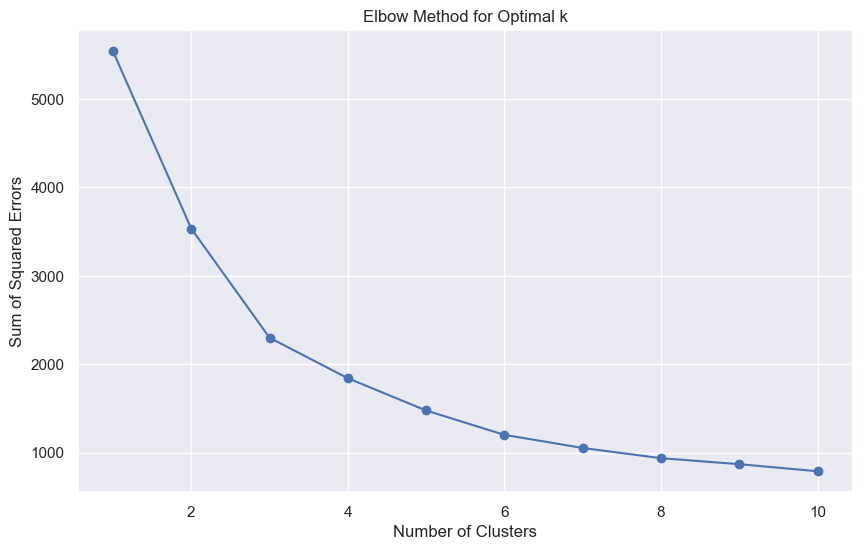

In [112]:
import os #https://www.geeksforgeeks.org/os-module-python-examples/

# Set the environment variable
os.environ['OMP_NUM_THREADS'] = '5'

# Print to ensure it's set
print("OMP_NUM_THREADS:", os.environ.get('OMP_NUM_THREADS'))


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
#https://stackoverflow.com/questions/51138686/how-to-use-silhouette-score-in-k-means-clustering-from-sklearn-library

# Standardize the features to make the data suitable for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE values to find the elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal k')
plt.show()


In [113]:
# Choose the optimal k and apply K-means clustering
optimal_k = 4  # Example, select based on the elbow chart
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
 # https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
# Evaluate the clustering
ari_score = adjusted_rand_score(y, clusters)

print(f"Adjusted Rand Index (ARI) for k={optimal_k}: {ari_score}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Adjusted Rand Index (ARI) for k=4: 0.17358334000999667


In [115]:
optimal_k = 3 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
 # https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
# Evaluate the clustering
ari_score = adjusted_rand_score(y, clusters)

print(f"Adjusted Rand Index (ARI) for k={optimal_k}: {ari_score}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Adjusted Rand Index (ARI) for k=3: 0.16256509464917865


In [117]:
optimal_k = 5 
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
 # https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
# Evaluate the clustering
ari_score = adjusted_rand_score(y, clusters)

print(f"Adjusted Rand Index (ARI) for k={optimal_k}: {ari_score}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Adjusted Rand Index (ARI) for k=5: 0.16193697201252227
